# Assignment 2
## Question 1: Zero-Order-Hold Discretization
$$
\begin{align}
x(t) =& e^{At}x_0+\int^{t}_{0}e^{A(t-\tau)}Bu(\tau)d\tau \\

\end{align}
$$
First, we can derive the properties, for given **time variable** $t_1$ and $t_2$
$$
\begin{align}
e^{A(t_1+t_2)} =& \sum^{\inf}_{k=0}\frac{1}{k!}A^k(t_1+t_2)^k\\
e^{At_1}\cdot e^{At_2} =& \sum^{\infty}_{k_1=0}\frac{1}{k!}A^k_1(t_1)^k_1 \cdot
                           \sum^{\infty}_{k_2=0}\frac{1}{k_2!}A^{k_2}(t_2)^{k_2}\\
                       =& \sum^{\infty}_{k_1=0} \sum^{\infty}_{k_2=0}A^{k_1+k_2}\frac{t_1^{k_1}t_2^{k_2}}{k_1!k_2!}
\end{align}
$$
To calculate the summation of all points from $[0,+\infty)$, we can sum them one point a a time, or we can sum them by using a moving slash line(show as figure below, in fact we exchanged the variables)

So the summation can be calculated in the direction of $k_{1}+k_2=n$
$$
\begin{align}
e^{At_1}\cdot e^{At_2} =& \sum^{\infty}_{n=0} \sum^{n}_{k=0}A^{n}\frac{t_1^{k}\cdot t_2^{(n-k)}}{k!(n-k)!}\\
                        =& \sum^{\infty}_{n=0}A^{n}\frac{(t_1+t_2)^{n}}{n!}\\
                        =& e^{A(t_1+t_2)}
\end{align}
$$

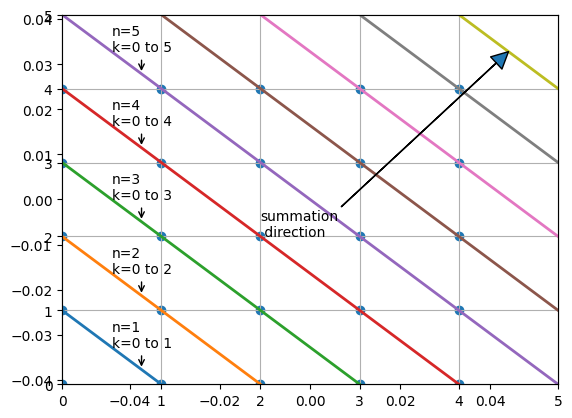

In [68]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,5)
y = np.arange(0,5)
x_m,y_m = np.meshgrid(x,y)
plt.figure()
plt.axis('equal')
ax = plt.axes()
ax.scatter(x_m,y_m)
for i in range(1,10):
    xx = np.linspace(0,i,100)
    yy = i-xx
    ax.plot(xx,yy,linewidth=2)
    plt.annotate('n={}\nk=0 to {}'.format(i,i),xy=(0.8,i-1+0.2),xytext=(0.5,i-1+0.5),
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))
plt.annotate('summation\n direction',xytext=(2,2),xy=(4.5,4.5),arrowprops=dict(width=0.2))
plt.grid()
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

Next part is about **Discretization**.$x(t)$is a continuous time signal only have value in $t>0$
$$
\begin{align}
x[n] =& x(t)\cdot \sum_{n=-\infty}^{\infty}\delta(t-n\delta t)\quad\\
    =& \sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)\\
\end{align}

$$
when the signal pass through a linear system $h(t)$($h(t)$ only have value when $t>0$)
$$
\begin{align}
y(t) =& \int^{\infty}_{-\infty}\sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)h(\tau)d\tau\\
    =& \int^{\infty}_{0}\sum_{n=0}^{\infty} x(n\delta t)\delta(t-n\delta t)h(\tau)d\tau\\
    =& \sum_{n=0}^{\infty}x(n\delta t)\int^{\infty}_{0}\delta(t-n\delta t)h(\tau)d\tau \\
    =& \sum_{n=0}^{\infty}x(n \delta t)h(t-n\delta t)
\end{align}
$$

For zero-order hold, $x[n]$ pass through $h(t) = u(t)-u(t-\delta t)$ and $y(t) = x(n\delta t)$ for $n\delta t<t<(n+1)\delta t$

$x_k$ is the kth term $x(n\delta t)$corresponds to $\delta(t-k\delta t)$

$$
x_k =x(k \delta t)= e^{Ak\delta t}x_0+\int^{k\delta t}_{0}e^{A(k\delta t-\tau)}Bu(\tau)d\tau
$$



$$
\begin{align}
x_{k+1} =& x(k \delta t+\delta t)= e^{Ak\delta t+\delta t}x_0+\int^{k\delta t+\delta t}_{0}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau\\
    =& e^{\delta t} e^{Ak\delta t}x_{0}+
    e^{\delta t}\int^{k\delta t}_{0}e^{A(k\delta t-\tau)}Bu(\tau)d\tau+
    \int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau \\
    =& e^{\delta t} x_{k}+\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau
\end{align}
$$
According to the question $u(t)$ is a zero-hold output $y_{u}(t)$of original $u_{0}(t)$, so it is a constant $u_k$ on $k\delta t<t<k\delta t+\delta t$ and we have
$$
\begin{align}
\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu(\tau)d\tau=&
\int^{k\delta t+\delta t}_{k\delta t}e^{A(k\delta t+\delta t-\tau)}Bu_{k}d\tau\\
=&e^{A(k\delta t+\delta t)}\int^{k\delta t+\delta t}_{k\delta t}e^{-A\tau}Bu_{k}d\tau\\
=& A^{-1}(e^{Ak\delta t}-I)Bu_k
\end{align}\\
where \quad \int e^{At}Bdt = A^{-1}e^{At}B+C
$$
So $A_k = e^{\delta t}, B_k=A^{-1}(e^{Ak\delta t}-I)$
$$
x_{k+1} = A_k x_k+B_k u_k
$$ 

## Question 2: Spatial Velocity
